In [ ]:
Problem Statement :
Technical Exercise for Data Scientist Candidates

For this exercise, you will be working with beer data which can be downloaded from here 
https://drive.google.com/open?id=1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq
 
Unzip the file and you should see a CSV file, called “BeerDataScienceProject.csv”

The columns are
beer_ABV	beer_beerId	beer_brewerId	beer_name	beer_style	review_appearance	review_palette	review_overall	review_taste	review_profileName	review_aroma	review_text	review_time


You may use any one or more among the following open source programming language(s) (Python, R, C++, Java, Scala, Julia, etc.) if you like to do so (no “SQL” Based Code). You are welcome to use any other open source framework, packages and technologies. Please provide your answers below the questions. 

When you submit your answers, please provide a link to your code in public repository like github with instructions on how to run it to reproduce your results.

Include few slides to summarize your findings and to convince the audience.     

Answer as many questions as possible.
 
Questions: 

1.	Rank top 3 Breweries which produce the strongest beers?
2.	Which year did beers enjoy the highest ratings? 
3.	 Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5.	Which Beer style seems to be the favorite based on reviews written by users? 
6.	How does written review compare to overall review score for the beer styles?
7.	How do find similar beer drinkers by using written reviews only?   

*Please include all plots you created to complete the project and to explain your results. 
    

In [1]:
# Importing Libraries:

import pandas as pd
import numpy as np
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
#from string import punctuation
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the data:

df=pd.read_csv('BeerDataScienceProject1.csv')
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290


In [5]:
# To findout the datatypes :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [6]:
# checking null values :
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [7]:
# Checking the correlation :

df.corr()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
beer_ABV,1.000000,0.218097,0.078540,0.252577,0.319468,0.119603,0.269182,0.271716,0.143451
beer_beerId,0.218097,1.000000,0.462537,0.050345,0.061283,-0.010388,0.036456,0.015569,0.462993
beer_brewerId,0.078540,0.462537,1.000000,-0.008476,0.013062,-0.016511,-0.005957,-0.013141,0.244962
review_appearance,0.252577,0.050345,-0.008476,1.000000,0.547691,0.486687,0.554775,0.534244,0.053290
review_palette,0.319468,0.061283,0.013062,0.547691,1.000000,0.601971,0.604271,0.706156,0.058557
review_overall,0.119603,-0.010388,-0.016511,0.486687,0.601971,1.000000,0.692454,0.783002,0.024381
review_taste,0.269182,0.036456,-0.005957,0.554775,0.604271,0.692454,1.000000,0.725273,0.051711
review_aroma,0.271716,0.015569,-0.013141,0.534244,0.706156,0.783002,0.725273,1.000000,0.036998
review_time,0.143451,0.462993,0.244962,0.053290,0.058557,0.024381,0.051711,0.036998,1.000000


In [8]:
# findout the ratio of null values :
print('beer_ABV :',20280/528869 *100)

beer_ABV : 3.834597981730826


In [9]:
print('review_profileName:',115/528869 *100)

review_profileName: 0.021744515182398665


In [10]:
print('review_text:',119/528869*100)

review_text: 0.022500846145264708


In [11]:
df=df.dropna()

In [13]:
df.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

In [14]:
df = df.sort_values('review_overall', ascending=False)

In [15]:
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",1221003321
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",1129192511
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,Thanks to mikereaser for sending this in a tra...,1235006981
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,this beer is a must try. very drinkable and ve...,1203476701
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,I've never met anyone that didn't like this be...,1135296352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412462,6.2,45558,73,Great Lakes Grassroots Ale,Saison / Farmhouse Ale,4.0,3.5,1.0,2.0,BMoney575,1.0,Sampled on 5-30-09 Best before 10-21-09 Pours ...,1243716795
188052,12.0,51067,782,Earthquake High Gravity Lager,American Malt Liquor,1.0,1.0,1.0,2.0,Avagadro,1.0,"A: can is poorly designed, but big with the ab...",1257479386
39601,4.0,3806,1413,Pub Pils,Czech Pilsener,0.0,2.0,0.0,3.0,beernut7,2.0,This is one of the most commercial tasting mic...,1030197670
39617,4.0,3804,1413,Latter Days Stout,Irish Dry Stout,0.0,4.0,0.0,2.0,beernut7,2.0,This beer presents with a heavy smoky roast ar...,1030267158


In [19]:
df['review_overall'].nunique()

10

In [22]:
df['review_overall'].value_counts()

4.0    189623
4.5    107758
3.5     94478
3.0     50831
5.0     30279
2.5     17421
2.0     11168
1.5      3709
1.0      3088
0.0         3
Name: review_overall, dtype: int64

In [24]:
df['review_profileName'].value_counts()

northyorksammy    1858
mikesgroove       1403
BuckeyeNation     1298
womencantsail     1238
Phyl21ca          1164
                  ... 
timquinn             1
Engineerbob          1
Paka                 1
ChadS99SVT           1
EP6UIZ               1
Name: review_profileName, Length: 22800, dtype: int64

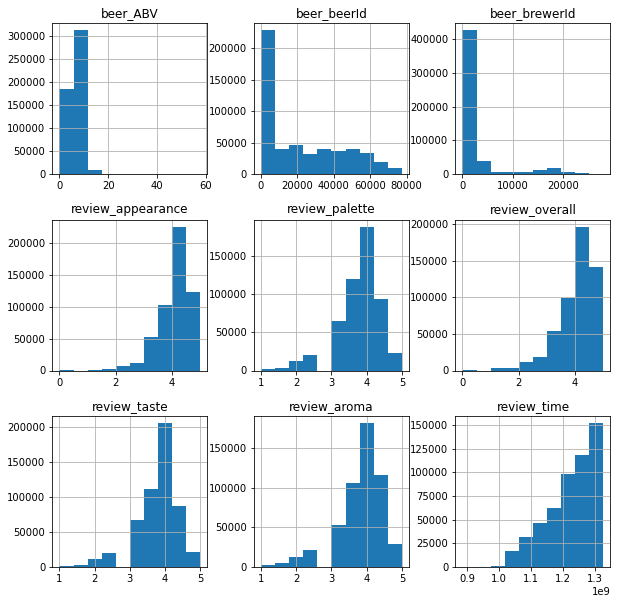

In [6]:
df.hist(figsize=(10,10))
# display histogram
plt.show()

Questions :

# 1.Rank top 3 Breweries which produce the strongest beers?

In [37]:
df1 = df.groupby(['beer_name','beer_brewerId'], as_index=False)['beer_ABV'].mean().sort_values(by=['beer_ABV'],ascending=False)
df1.head(3)

,beer_name,beer_brewerId,beer_ABV
15912,Schorschbräu Schorschbock 57%,6513,57.70
15911,Schorschbräu Schorschbock 43%,6513,43.00
15910,Schorschbräu Schorschbock 40%,6513,39.44


In [38]:

df2 = df.groupby(['beer_brewerId'], as_index=False)['beer_ABV'].mean().sort_values(by=['beer_ABV'],ascending=False)
df2.head(3)

,beer_brewerId,beer_ABV
784,6513,19.228824
175,736,13.750000
1644,24215,12.466667


# 2.Which year did beers enjoy the highest ratings? 

In [36]:
# conversion of time to Year :

from datetime import datetime
year=[]
for i in df['review_time']:
    timestamp=i
    years=datetime.fromtimestamp(timestamp).year
    year.append(years)
print(df['year'])  

0         2009
1         2009
2         2009
3         2009
4         2010
          ... 
528865    2008
528866    2008
528867    2008
528868    2008
528869    2008
Name: year, Length: 528870, dtype: int64


In [8]:
# To check year seperatly :

df['year']=year
df['year']

0         2009
1         2009
2         2009
3         2009
4         2010
          ... 
528865    2008
528866    2008
528867    2008
528868    2008
528869    2008
Name: year, Length: 528870, dtype: int64

In [10]:
# Year wise count :
df['year'].value_counts()

2011    110843
2010     93776
2009     83567
2008     69086
2007     46478
2006     43070
2005     29422
2004     22904
2003     18174
2002      7577
2012      3291
2001       601
2000        33
1999        25
1998        23
Name: year, dtype: int64

2011    110843
2010     93776
2009     83567
2008     69086
2007     46478
2006     43070
2005     29422
2004     22904
2003     18174
2002      7577
2012      3291
2001       601
2000        33
1999        25
1998        23
Name: year, dtype: int64


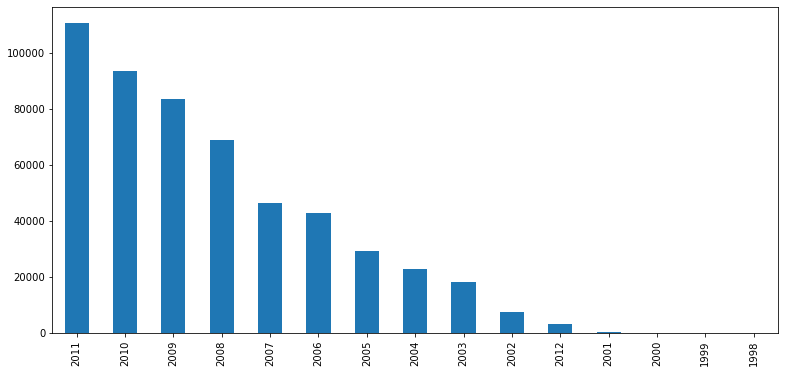

In [11]:
print(df['year'].value_counts())
plt.figure(figsize=(13,6))
p=df['year'].value_counts().head(100).plot.bar()
p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.show()

Maximum reviews are collected during the year 2011
from 1998 the reviews are gradually increasing

In [24]:
# Review analysis:
collected_Data = df[['beer_beerId','beer_name','review_overall','review_time','year']]
collected_Data

,beer_beerId,beer_name,review_overall,review_time,year
0,47986,Sausa Weizen,1.5,1234817823,2009
1,48213,Red Moon,3.0,1235915097,2009
2,48215,Black Horse Black Beer,3.0,1235916604,2009
3,47969,Sausa Pils,3.0,1234725145,2009
4,64883,Cauldron DIPA,4.0,1293735206,2010
...,...,...,...,...,...
528865,4032,Dinkel Acker Dark,4.0,1205212721,2008
528866,4032,Dinkel Acker Dark,3.0,1203490783,2008
528867,4032,Dinkel Acker Dark,4.5,1201320897,2008
528868,4032,Dinkel Acker Dark,4.0,1201215290,2008


In [5]:
df['beer_beerId'].value_counts()

1904     3000
276      2587
11757    2502
2671     2492
34       2483
         ... 
73328       1
73785       1
70614       1
58898       1
47986       1
Name: beer_beerId, Length: 20200, dtype: int64

In [25]:
collected_Data = collected_Data.reset_index(drop=True)

In [26]:
collected_Data.head(5)

,beer_beerId,beer_name,review_overall,review_time,year
0,47986,Sausa Weizen,1.5,1234817823,2009
1,48213,Red Moon,3.0,1235915097,2009
2,48215,Black Horse Black Beer,3.0,1235916604,2009
3,47969,Sausa Pils,3.0,1234725145,2009
4,64883,Cauldron DIPA,4.0,1293735206,2010


In [27]:
#
aggrReview_Data = collected_Data.groupby(['year'], as_index=False)['review_overall'].agg('mean')

In [28]:
aggrReview_Data.head(5)

,year,review_overall
0,1998,3.891304
1,1999,4.000000
2,2000,4.181818
3,2001,3.929285
4,2002,3.798733


In [29]:
# sorting the dataframe in desceding order

aggrReview_Data = aggrReview_Data.sort_values(by=['review_overall'], ascending=False)

In [30]:

aggrReview_Data.head(5)

,year,review_overall
2,2000,4.181818
1,1999,4.000000
3,2001,3.929285
0,1998,3.891304
12,2010,3.866288


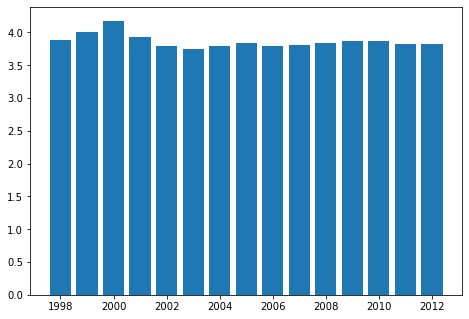

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(aggrReview_Data.year,aggrReview_Data.review_overall)
plt.show()


 Observation :from the above bar plot we ca say that  year '2000' beer enjoys higest overall ratings of "4.1818"

# 3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [39]:
columns= df[['review_taste','review_aroma','review_appearance','review_palette','review_overall']]
columns.head()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
0,1.5,1.5,2.5,2.0,1.5
1,3.0,3.0,3.0,2.5,3.0
2,3.0,3.0,3.0,2.5,3.0
3,2.5,3.0,3.5,3.0,3.0
4,4.0,4.5,4.0,4.5,4.0


<AxesSubplot:>

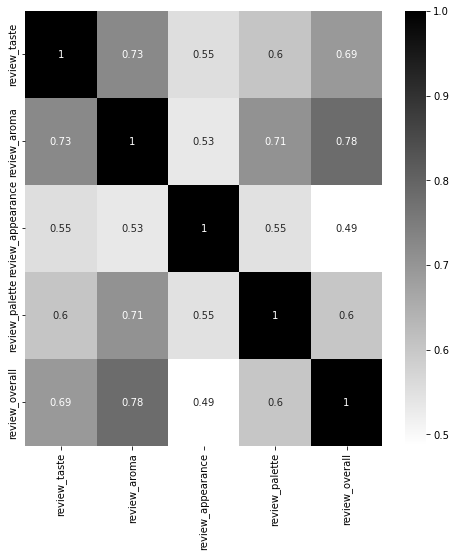

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(columns.corr(),cmap='binary',annot=True)

In [ ]:
# Below its clearly showing that:

- review_aroma is highly correlated with review_overall having correlation of 78%

- Review_taste has correlation of 69% with review_overall

-review_palette has correlation of 60%

-review_appearance is weakly correlated with 49 %

# 4.If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [43]:
beers= df.groupby('beer_name').agg({'review_overall': np.mean,'review_aroma': np.mean,'review_appearance': np.mean,
                                    'review_palette': np.mean,'review_taste': np.mean,'beer_ABV': np.mean})
top_beers = pd.DataFrame(beers.reset_index()).sort_values(['review_overall', 'review_aroma','review_appearance','review_palette','review_taste','beer_ABV'], ascending=[False,False, False, False, False, False])
top_3_beers_names = pd.merge(top_beers[:3],df[['beer_name','beer_beerId','beer_style']],on='beer_name') 
top_3_beers_names

,beer_name,review_overall,review_aroma,review_appearance,review_palette,review_taste,beer_ABV,beer_beerId,beer_style
0,Edsten Triple-Wit,5.0,5.0,5.0,5.0,5.0,10.0,1734,Belgian Strong Pale Ale
1,Old Gander Barley Wine,5.0,5.0,5.0,5.0,5.0,9.5,29423,American Barleywine
2,Rogue Black Brutal,5.0,5.0,5.0,5.0,5.0,9.0,45944,Schwarzbier


#Top 3 names  of bear :
1.Edsten Triple-Wit
2.Old Gander Barley Wine
3.Rogue Black Brutal

# 5.Which Beer style seems to be the favorite based on reviews written by users? 

In [44]:
# we will eliminate the following list items from stopwords so when we remove stopwords from review this words will not be removed as we are doing sentiment analysis
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split


In [ ]:
df4=df[['review_text']]
df4


In [48]:
df['review_overall'].value_counts()

4.0    196544
4.5    110928
3.5     98901
3.0     53707
5.0     31028
2.5     18539
2.0     11931
1.5      3996
1.0      3293
0.0         3
Name: review_overall, dtype: int64

In [61]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
def remove_stopwords(data):
    text_without_stop=[i for i in data if i not in stop]
    return text_without_stop

In [63]:

import re
# converting to lower()
df['review_text']=df['review_text'].str.lower()

#removing_stopwords
df['review_text']=df['review_text'].apply(lambda x: ' '.join( term for term in str(x).split() if term not in stop ))

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

In [66]:
df['polarity_score'] = df['review_text'].apply(lambda x: senti.polarity_scores(x)['compound'])

In [67]:
# Group by 'beer_style' and calculate mean of polarity score
df.groupby('beer_style')['polarity_score'].mean().sort_values(ascending=False)[0:10]

beer_style
Eisbock                             0.900489
Quadrupel (Quad)                    0.892434
Wheatwine                           0.886034
Braggot                             0.883919
Flanders Red Ale                    0.883671
American Double / Imperial Stout    0.878757
Kvass                               0.873436
Dortmunder / Export Lager           0.873017
American Wild Ale                   0.871063
Belgian Strong Dark Ale             0.870829
Name: polarity_score, dtype: float64

# 6.How does written review compare to overall review score for the beer styles?

In [68]:
ratings = df.groupby('beer_style').agg({'polarity_score': np.mean,'review_overall': np.mean})
score= pd.DataFrame(ratings.reset_index()).sort_values(['polarity_score','review_overall'], ascending=[False,False])
score.head()

,beer_style,polarity_score,review_overall
41,Eisbock,0.900489,4.079487
86,Quadrupel (Quad),0.892434,4.049250
101,Wheatwine,0.886034,3.817059
32,Braggot,0.883919,3.645729
58,Flanders Red Ale,0.883671,3.962561


7.How do find similar beer drinkers by using written reviews only?   